In [1]:
import pandas as pd
from IPython.display import display
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler
from sklearn.model_selection import GridSearchCV
from sklearn.neural_network import MLPClassifier
import numpy as np
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score
import matplotlib.cm as cm_matlib
import time
from sklearn.metrics import confusion_matrix



In [2]:
prova = pd.read_csv("adult.data", sep=",")
prova

,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32555,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32556,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32557,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32558,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


## *Preprocessing* : the column labels are not consistent with the features declared in the "adult.names" file 
 * In that case it could be helpful the "header" parameter of the read_csv method

In [3]:
indexes = ["age", "workclass", "fnlwgt", "education", "education-num", "marital-status", \
          "occupation", "relationship", "race", "sex", "capital-gain", "capital-loss", "hours-per-week", \
           "native-country", "income"]

In [4]:
dataset = pd.read_csv("adult.data", sep=",", header = None, names=indexes)
dataset

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32559,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


## Now that the headers are correct we can move on to the *Data Cleaning* phase

* Check if there are Nan values

In [5]:
dataset.isnull().any()

age               False
workclass         False
fnlwgt            False
education         False
education-num     False
marital-status    False
occupation        False
relationship      False
race              False
sex               False
capital-gain      False
capital-loss      False
hours-per-week    False
native-country    False
income            False
dtype: bool

* Check for duplicates

In [6]:
dataset.duplicated().any()

True

In [7]:
dataset.drop_duplicates(inplace=True)

In [8]:
print(str(len(dataset.columns))+" columns")
print(str(len(dataset))+" rows")

15 columns
32537 rows


## Since the dataset has already been altered, from the adult.names file we know of the presence of "?" values, used to replace the "Unknown" value, so let's remove the lines containing the value ?

In [9]:
dataset.isin([" ?"]).any()

age               False
workclass          True
fnlwgt            False
education         False
education-num     False
marital-status    False
occupation         True
relationship      False
race              False
sex               False
capital-gain      False
capital-loss      False
hours-per-week    False
native-country     True
income            False
dtype: bool

In [10]:
for column in dataset.columns:
    index_to_delete = dataset[ dataset[column] == ' ?'].index
    dataset.drop(index_to_delete,inplace=True)

In [11]:
dataset.reset_index(inplace=True, drop=True)

* The "?" values are successfully removed

In [12]:
print("The number of rows is", len(dataset))
print("Number of rows with capital-gain equal to 0:", len(dataset[dataset['capital-gain'] == 0]))
print("Number of rows with capital-loss equal to 0:", len(dataset[dataset['capital-loss'] == 0]))

The number of rows is 30139
Number of rows with capital-gain equal to 0: 27601
Number of rows with capital-loss equal to 0: 28712


### We remove the capital-gain and capital-loss columns because they do not provide useful information (most rows have value 0)

In [13]:
dataset.drop(['capital-gain', 'capital-loss'], axis=1, inplace=True)

In [14]:
dataset

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...
30134,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,38,United-States,<=50K
30135,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,40,United-States,>50K
30136,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,40,United-States,<=50K
30137,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,20,United-States,<=50K


## Descriptive Analytics
### We analyze with a bar plot each feature compared with the income 

In [15]:
# 
# index_col: the feature that we want to plot
# big: we use it only when the feature has many unique values and we want a more readable plot
#
def bar_plot_feature(index_col, big=False):
            
    frame = dataset.pivot_table(index=index_col, values='age',  \
                                columns='income', aggfunc='count', fill_value=0)
    
    frame['%_<='] = (frame[' <=50K'] / (frame[' <=50K'] + frame[' >50K']) ).round(2)
    frame['%_>'] = (frame[' >50K'] / (frame[' <=50K'] + frame[' >50K']) ).round(2)
    
    display(frame)
    
    if(big):
        frame.loc[:,'%_<=':'%_>'].plot.barh(figsize=(10,10))
    else:
        frame.loc[:,'%_<=':'%_>'].plot.barh()

income,<=50K,>50K,%_<=,%_>
workclass,,,,
Federal-gov,578,365,0.61,0.39
Local-gov,1458,609,0.71,0.29
Private,17390,4874,0.78,0.22
Self-emp-inc,474,600,0.44,0.56
Self-emp-not-inc,1784,714,0.71,0.29
State-gov,935,344,0.73,0.27
Without-pay,14,0,1.00,0.00


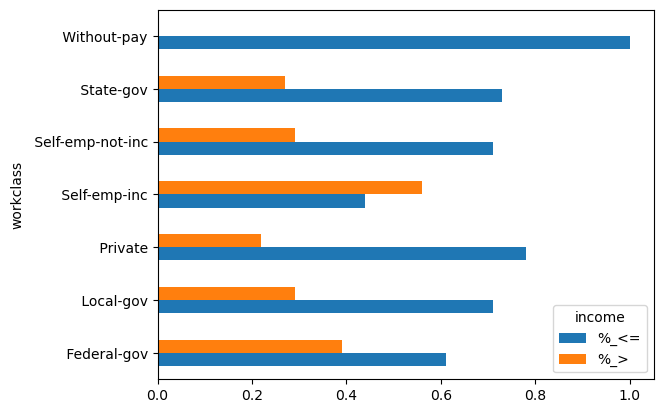

In [17]:
bar_plot_feature('workclass')

income,<=50K,>50K,%_<=,%_>
education,,,,
10th,761,59,0.93,0.07
11th,989,59,0.94,0.06
12th,348,29,0.92,0.08
1st-4th,143,6,0.96,0.04
5th-6th,275,12,0.96,0.04
7th-8th,521,35,0.94,0.06
9th,430,25,0.95,0.05
Assoc-acdm,752,256,0.75,0.25
Assoc-voc,963,344,0.74,0.26


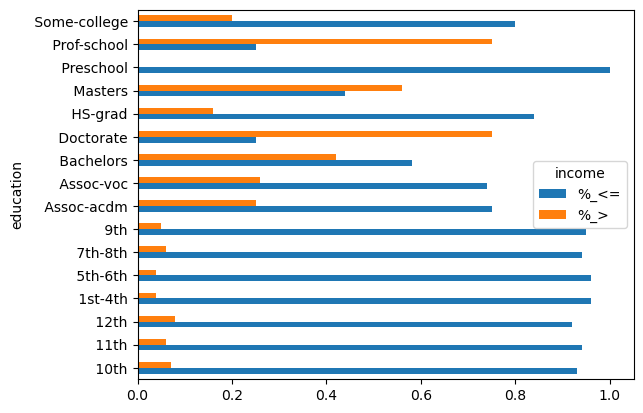

In [18]:
bar_plot_feature('education')

income,<=50K,>50K,%_<=,%_>
marital-status,,,,
Divorced,3760,452,0.89,0.11
Married-AF-spouse,11,10,0.52,0.48
Married-civ-spouse,7662,6397,0.54,0.46
Married-spouse-absent,339,31,0.92,0.08
Never-married,9241,470,0.95,0.05
Separated,873,66,0.93,0.07
Widowed,747,80,0.90,0.10


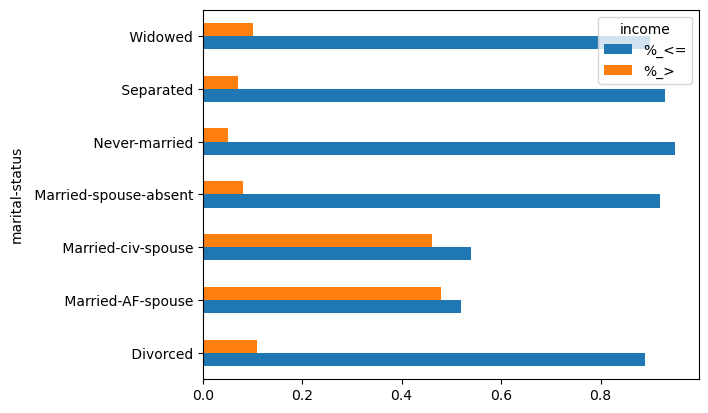

In [19]:
bar_plot_feature('marital-status')

income,<=50K,>50K,%_<=,%_>
occupation,,,,
Adm-clerical,3221,498,0.87,0.13
Armed-Forces,8,1,0.89,0.11
Craft-repair,3117,908,0.77,0.23
Exec-managerial,2054,1937,0.51,0.49
Farming-fishing,872,115,0.88,0.12
Handlers-cleaners,1266,83,0.94,0.06
Machine-op-inspct,1720,244,0.88,0.12
Other-service,3077,132,0.96,0.04
Priv-house-serv,140,1,0.99,0.01


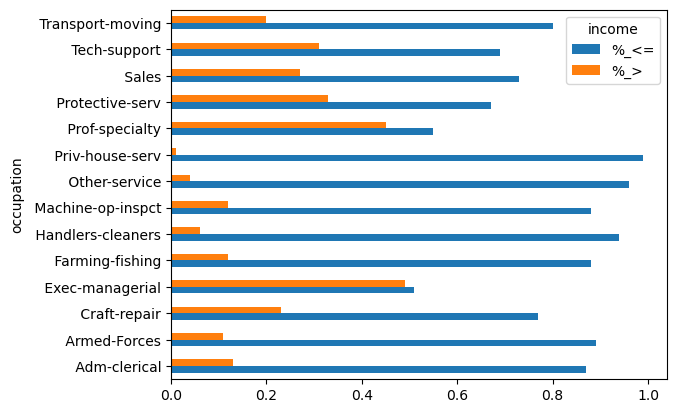

In [20]:
bar_plot_feature('occupation')

income,<=50K,>50K,%_<=,%_>
relationship,,,,
Husband,6780,5677,0.54,0.46
Not-in-family,6891,823,0.89,0.11
Other-relative,854,35,0.96,0.04
Own-child,4398,64,0.99,0.01
Unmarried,2998,213,0.93,0.07
Wife,712,694,0.51,0.49


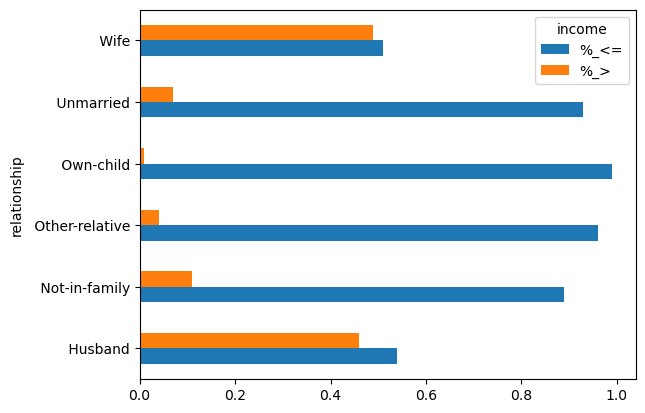

In [21]:
bar_plot_feature('relationship')

income,<=50K,>50K,%_<=,%_>
race,,,,
Amer-Indian-Eskimo,252,34,0.88,0.12
Asian-Pac-Islander,646,248,0.72,0.28
Black,2450,366,0.87,0.13
Other,210,21,0.91,0.09
White,19075,6837,0.74,0.26


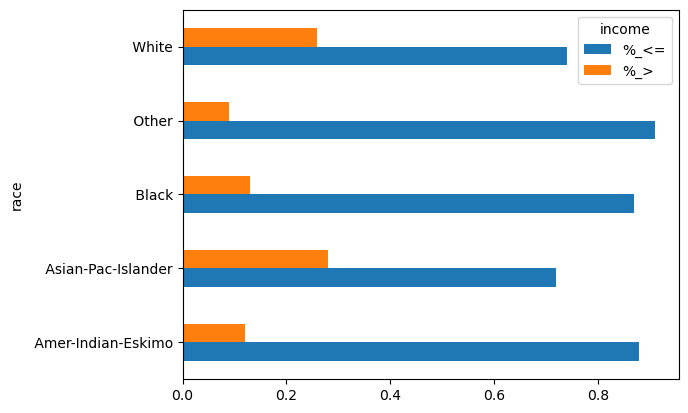

In [22]:
bar_plot_feature('race')

income,<=50K,>50K,%_<=,%_>
sex,,,,
Female,8661,1112,0.89,0.11
Male,13972,6394,0.69,0.31


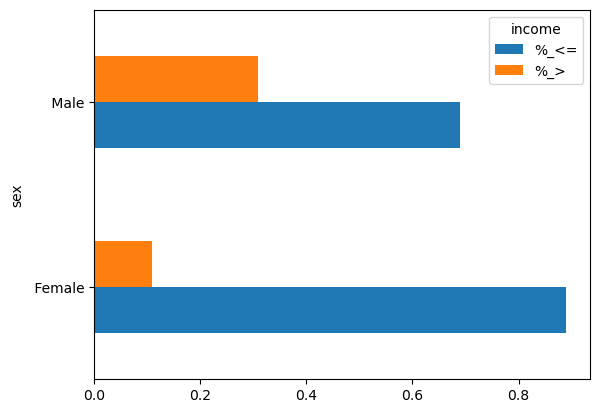

In [23]:
bar_plot_feature('sex')

income,<=50K,>50K,%_<=,%_>
native-country,,,,
Cambodia,11,7,0.61,0.39
Canada,71,36,0.66,0.34
China,48,20,0.71,0.29
Columbia,54,2,0.96,0.04
Cuba,67,25,0.73,0.27
Dominican-Republic,65,2,0.97,0.03
Ecuador,23,4,0.85,0.15
El-Salvador,91,9,0.91,0.09
England,56,30,0.65,0.35


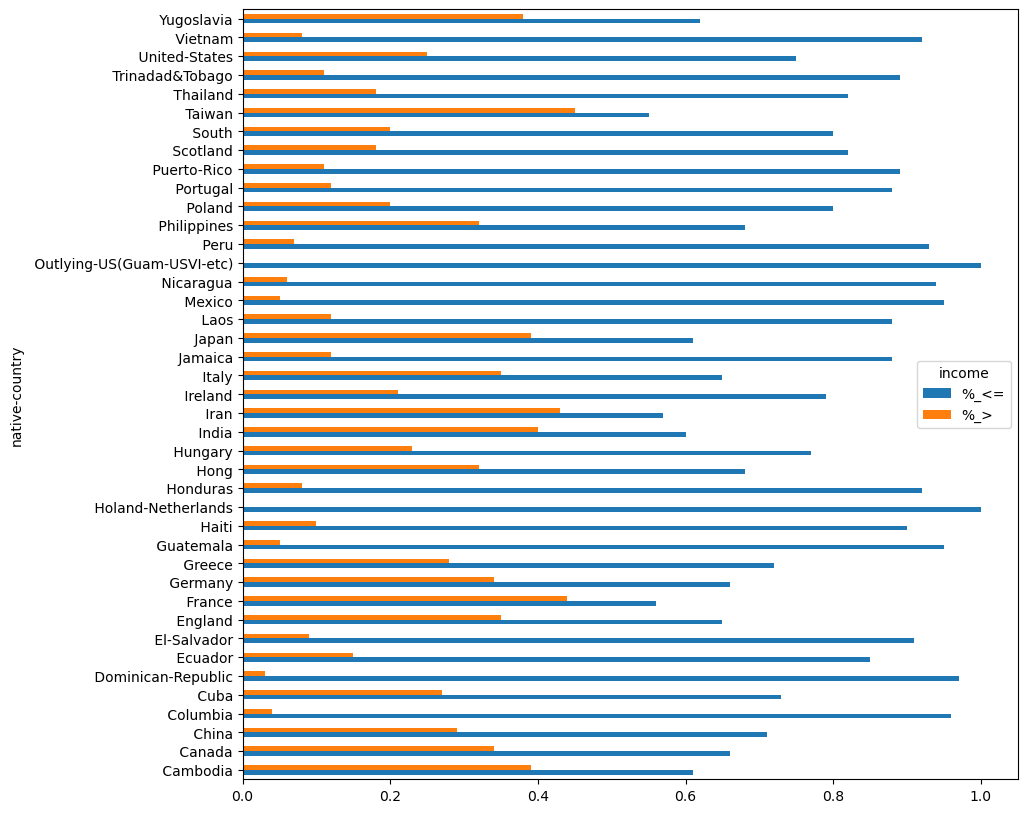

In [24]:
bar_plot_feature('native-country', big=True)

income,<=50K,>50K,%_<=,%_>
ten_year,,,,
10-20,1364,1,1.00,0.00
20-30,6913,493,0.93,0.07
30-40,5967,2241,0.73,0.27
40-50,4303,2591,0.62,0.38
50-60,2547,1638,0.61,0.39
60-70,1182,452,0.72,0.28
70-80,280,77,0.78,0.22
80-90,50,6,0.89,0.11
90-100,27,7,0.79,0.21


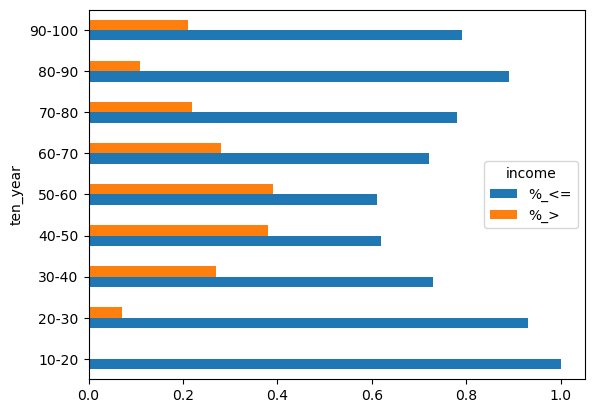

In [25]:
# we create groups of 10 year 

dataset['ten_year'] = dataset['age']//10
for i in dataset.index:
    dataset.loc[i,'ten_year'] = str(dataset.loc[i,'ten_year'])+'0-'+str(dataset.loc[i,'ten_year'] + 1)+'0'
dataset

bar_plot_feature('ten_year')

In [26]:
# we delete the new added column
dataset.drop('ten_year',axis=1,inplace=True)
dataset

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...
30134,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,38,United-States,<=50K
30135,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,40,United-States,>50K
30136,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,40,United-States,<=50K
30137,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,20,United-States,<=50K


income,<=50K,>50K,%_<=,%_>
hours,,,,
0-5,67,6,0.92,0.08
10-15,385,26,0.94,0.06
15-20,597,33,0.95,0.05
20-25,1259,94,0.93,0.07
25-30,665,42,0.94,0.06
30-35,1192,103,0.92,0.08
35-40,1689,334,0.83,0.17
40-45,11546,3295,0.78,0.22
45-50,1534,866,0.64,0.36


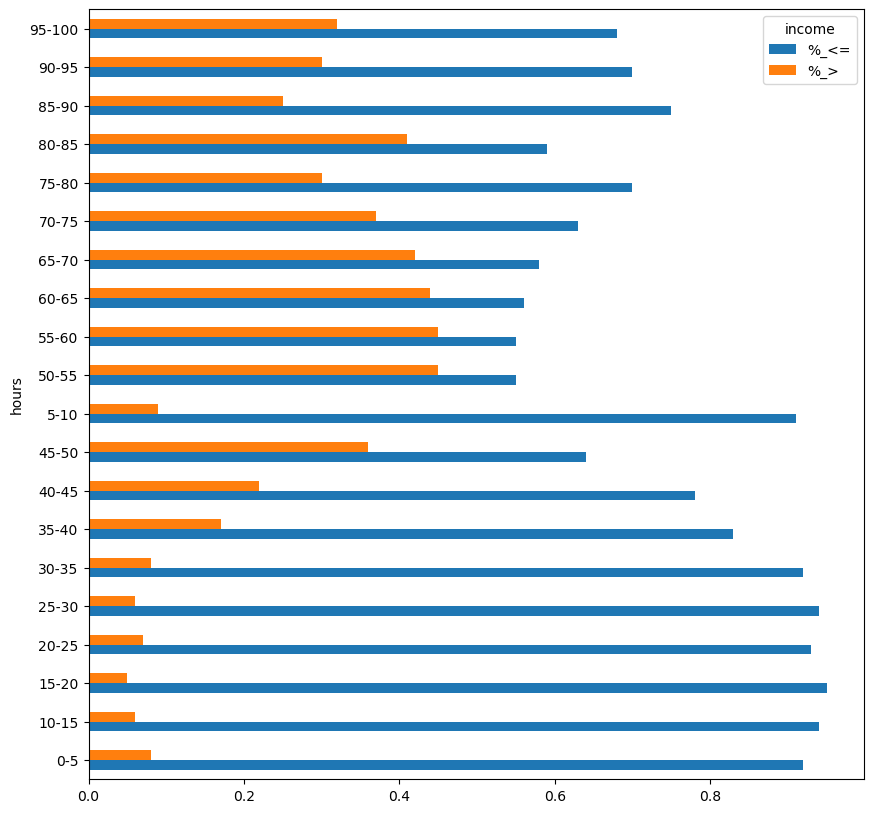

In [27]:
# we create group of 5 hours 

dataset['hours'] = dataset['hours-per-week']//5
for i in dataset.index:
    dataset.loc[i,'hours'] = str(dataset.loc[i,'hours'] * 5)+'-'+str(dataset.loc[i,'hours'] * 5 + 5)
dataset

bar_plot_feature('hours', big=True)

#### Notice that since the groups of hours are listed in lexicographically order, the group "5-10" is listed after the group "45-50". 

In [28]:
# we delete the new added column
dataset.drop('hours',axis=1,inplace=True)
dataset

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...
30134,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,38,United-States,<=50K
30135,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,40,United-States,>50K
30136,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,40,United-States,<=50K
30137,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,20,United-States,<=50K


### Observing the graphs it can be seen that the values of the "husband" and "wife" relationship feature are redundant because we have the marital-status and sex features from which the same information can be obtained

In [15]:
dataset.drop(columns=['relationship'],inplace=True)
dataset

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,race,sex,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,White,Male,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,White,Male,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,White,Male,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Black,Male,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Black,Female,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...
30134,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,White,Female,38,United-States,<=50K
30135,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,White,Male,40,United-States,>50K
30136,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,White,Female,40,United-States,<=50K
30137,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,White,Male,20,United-States,<=50K


## We prepare the dataset for the prediction model

### The values of the "income" are replaced with 0 and 1 (being a binary value)

In [16]:
dataset.replace({'income': '<=50K'}, value=0, regex=True, inplace=True)
dataset.replace({'income': '>50K'}, value=1, regex=True, inplace=True)
dataset

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,race,sex,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,White,Male,40,United-States,0
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,White,Male,13,United-States,0
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,White,Male,40,United-States,0
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Black,Male,40,United-States,0
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Black,Female,40,Cuba,0
...,...,...,...,...,...,...,...,...,...,...,...,...
30134,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,White,Female,38,United-States,0
30135,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,White,Male,40,United-States,1
30136,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,White,Female,40,United-States,0
30137,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,White,Male,20,United-States,0


### We observed that the dataset is unbalanced, in fact the 75% of the income observations is equal to 0. 

In [24]:
len(dataset[dataset['income'] == 0]) / len(dataset)

0.7509539135339593

In [25]:
len(dataset[dataset['income'] == 1]) / len(dataset)

0.24904608646604068

### The values of the "sex" are replaced with 0 and 1 (being a binary value)

In [17]:
dataset.replace({'sex': 'Male'}, value=0, regex=True, inplace=True)
dataset.replace({'sex': 'Female'}, value=1, regex=True, inplace=True)
dataset

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,race,sex,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,White,0,40,United-States,0
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,White,0,13,United-States,0
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,White,0,40,United-States,0
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Black,0,40,United-States,0
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Black,1,40,Cuba,0
...,...,...,...,...,...,...,...,...,...,...,...,...
30134,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,White,1,38,United-States,0
30135,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,White,0,40,United-States,1
30136,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,White,1,40,United-States,0
30137,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,White,0,20,United-States,0


In [19]:
print(dataset['education'].unique())
print(dataset['education-num'].unique())

[' Bachelors' ' HS-grad' ' 11th' ' Masters' ' 9th' ' Some-college'
 ' Assoc-acdm' ' 7th-8th' ' Doctorate' ' Assoc-voc' ' Prof-school'
 ' 5th-6th' ' 10th' ' Preschool' ' 12th' ' 1st-4th']
[13  9  7 14  5 10 12  4 16 11 15  3  6  1  8  2]


### Since "education" has associated the column "education-num" we delete the former and we keep the latter, which is numerical and respects the order

### We delete also the "fnlwgt" (final weight) column because it does not provide useful information for our goal 

In [26]:
dataset.drop(['fnlwgt','education'], axis=1, inplace=True)
dataset

,age,workclass,education-num,marital-status,occupation,race,sex,hours-per-week,native-country,income
0,39,State-gov,13,Never-married,Adm-clerical,White,0,40,United-States,0
1,50,Self-emp-not-inc,13,Married-civ-spouse,Exec-managerial,White,0,13,United-States,0
2,38,Private,9,Divorced,Handlers-cleaners,White,0,40,United-States,0
3,53,Private,7,Married-civ-spouse,Handlers-cleaners,Black,0,40,United-States,0
4,28,Private,13,Married-civ-spouse,Prof-specialty,Black,1,40,Cuba,0
...,...,...,...,...,...,...,...,...,...,...
30134,27,Private,12,Married-civ-spouse,Tech-support,White,1,38,United-States,0
30135,40,Private,9,Married-civ-spouse,Machine-op-inspct,White,0,40,United-States,1
30136,58,Private,9,Widowed,Adm-clerical,White,1,40,United-States,0
30137,22,Private,9,Never-married,Adm-clerical,White,0,20,United-States,0


### We apply OneHotEncoder method on categorical-data columns

In [27]:
def Encoding(columnName, dataset):
    a = dataset[columnName].unique()
    a.sort()

    encoder = OneHotEncoder(handle_unknown='ignore')
    encoder_df = pd.DataFrame(encoder.fit_transform(dataset[[columnName]]).astype(int).toarray())
    
    diz = {i:columnName+'( '+el+' )' for i,el in enumerate(a)}
        
    dataset2 = dataset.join(encoder_df)
    dataset2.drop(columnName, axis=1, inplace=True)
    dataset2.rename(columns=diz, inplace=True)
    return dataset2

In [28]:
datatypes = dataset.dtypes
columnNames = dataset.columns
for i,el in enumerate(datatypes):
    if el == "object":
        dataset = Encoding(columnNames[i], dataset)
dataset

,age,education-num,sex,hours-per-week,income,workclass( Federal-gov ),workclass( Local-gov ),workclass( Private ),workclass( Self-emp-inc ),workclass( Self-emp-not-inc ),...,native-country( Portugal ),native-country( Puerto-Rico ),native-country( Scotland ),native-country( South ),native-country( Taiwan ),native-country( Thailand ),native-country( Trinadad&Tobago ),native-country( United-States ),native-country( Vietnam ),native-country( Yugoslavia )
0,39,13,0,40,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,50,13,0,13,0,0,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
2,38,9,0,40,0,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
3,53,7,0,40,0,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
4,28,13,1,40,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30134,27,12,1,38,0,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
30135,40,9,0,40,1,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
30136,58,9,1,40,0,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
30137,22,9,0,20,0,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0


### Before the analysis we normalize the numerical data

In [29]:
scaler = MinMaxScaler() 

for c in dataset.columns:
    dataset[[c]] = scaler.fit_transform(dataset[[c]])
dataset


,age,education-num,sex,hours-per-week,income,workclass( Federal-gov ),workclass( Local-gov ),workclass( Private ),workclass( Self-emp-inc ),workclass( Self-emp-not-inc ),...,native-country( Portugal ),native-country( Puerto-Rico ),native-country( Scotland ),native-country( South ),native-country( Taiwan ),native-country( Thailand ),native-country( Trinadad&Tobago ),native-country( United-States ),native-country( Vietnam ),native-country( Yugoslavia )
0,0.301370,0.800000,0.0,0.397959,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,0.452055,0.800000,0.0,0.122449,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,0.287671,0.533333,0.0,0.397959,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,0.493151,0.400000,0.0,0.397959,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,0.150685,0.800000,1.0,0.397959,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30134,0.136986,0.733333,1.0,0.377551,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
30135,0.315068,0.533333,0.0,0.397959,1.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
30136,0.561644,0.533333,1.0,0.397959,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
30137,0.068493,0.533333,0.0,0.193878,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [30]:
# Move the income column to the end of the data frame 

old_columns = dataset.columns.tolist()

index = dataset.columns.get_loc("income")

new_columns = old_columns[0:index] + old_columns[index+1:] + old_columns[index:index+1]

dataset = dataset[new_columns]
dataset

,age,education-num,sex,hours-per-week,workclass( Federal-gov ),workclass( Local-gov ),workclass( Private ),workclass( Self-emp-inc ),workclass( Self-emp-not-inc ),workclass( State-gov ),...,native-country( Puerto-Rico ),native-country( Scotland ),native-country( South ),native-country( Taiwan ),native-country( Thailand ),native-country( Trinadad&Tobago ),native-country( United-States ),native-country( Vietnam ),native-country( Yugoslavia ),income
0,0.301370,0.800000,0.0,0.397959,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,0.452055,0.800000,0.0,0.122449,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,0.287671,0.533333,0.0,0.397959,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,0.493151,0.400000,0.0,0.397959,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4,0.150685,0.800000,1.0,0.397959,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30134,0.136986,0.733333,1.0,0.377551,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
30135,0.315068,0.533333,0.0,0.397959,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
30136,0.561644,0.533333,1.0,0.397959,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
30137,0.068493,0.533333,0.0,0.193878,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


### Principal Component Analysis 

In [38]:
x_train = dataset.iloc[:,0:-1].values
y_train = dataset.iloc[:,-1].values

PVE:[0.17758344 0.09412176], cumulative PVE:0.2717052014799842


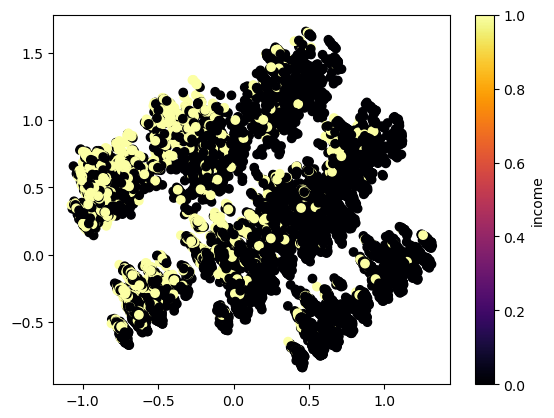

In [46]:
# dimensionality reduction with PCA
pca_model = PCA(n_components=2)

pca_coordinates = pca_model.fit_transform(x_train)

plt.scatter(pca_coordinates[:, 0], pca_coordinates[:, 1], c=y_train, cmap=plt.colormaps.get_cmap('inferno'))
plt.colorbar(label='income')


PVE = pca_model.explained_variance_ratio_
PVE_cum = np.sum(PVE)

print(f'PVE:{PVE}, cumulative PVE:{PVE_cum}')

### Biplot PCA

In [100]:
ldngs = pca_model.components_

In [101]:
def second_argmax(array):
    
    id1, id2, max1, max2 = 0, 0, 0, 0
    
    for i, v in enumerate(array):
        if(v > max1):
            max2 = max1
            id2 = id1
            
            max1 = v
            id1 = i
        elif(v > max2):
            max2 = v
            id2 = i
    
    return id1, max1, id2, max2

In [105]:
# loadings are in absolute value

id1_x, max1_x, id2_x, max2_x = second_argmax(abs(ldngs[0]))
print("Highest loadings on PC1: \n",dataset.columns[id1_x], max1_x,"\n", dataset.columns[id2_x], max2_x)

print()

id1_y, max1_y, id2_y, max2_y = second_argmax(abs(ldngs[1]))
print("Highest loadings on PC2: \n",dataset.columns[id1_y], max1_y,"\n", dataset.columns[id2_y], max2_y)

Highest loadings on PC1: 
 marital-status(  Married-civ-spouse ) 0.6539013025206619 
 marital-status(  Never-married ) 0.49956161347621536

Highest loadings on PC2: 
 workclass(  Private ) 0.6723011619766074 
 sex 0.39598474941616857


In [112]:
def draw_arrow(index, name, ax): 
    
    ax.arrow(0, 0, ldngs[0, index], 
                 ldngs[1, index], 
                 head_width=0.03, 
                 head_length=0.03)

    ax.text(ldngs[0, index] * 1.15, 
                ldngs[1, index] * 1.15, 
                name, fontsize = 18)

Text(0.5, 1.0, 'Biplot PCA')

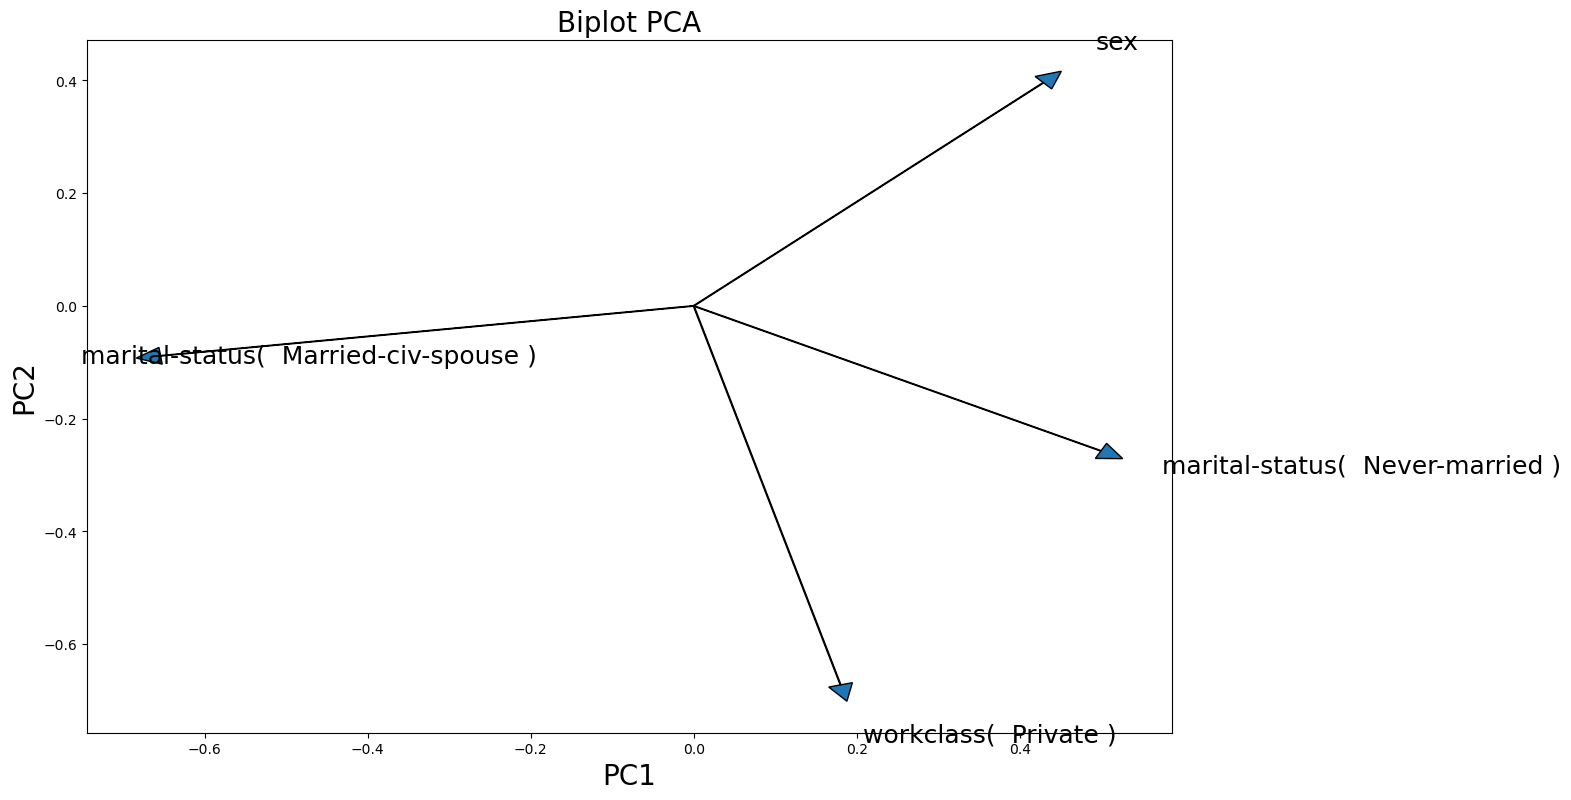

In [119]:
fig, ax = plt.subplots(figsize=(14, 9))

draw_arrow(id1_x, dataset.columns[id1_x], ax)
draw_arrow(id2_x, dataset.columns[id2_x], ax)
draw_arrow(id1_y, dataset.columns[id1_y], ax)
draw_arrow(id2_y, dataset.columns[id2_y], ax)

ax.set_xlabel('PC1', fontsize=20)
ax.set_ylabel('PC2', fontsize=20)
ax.set_title('Biplot PCA', fontsize=20)

### Preparing the testing set

In [31]:
# |1x3 Cross validator
def data_cleaning(dataset):
    
    dataset.dropna(inplace=True)
    dataset.drop_duplicates(inplace=True)
    
    for column in dataset.columns:
        index_to_delete = dataset[ dataset[column] == ' ?'].index
        dataset.drop(index_to_delete,inplace=True)
    dataset.reset_index(inplace=True, drop=True)
    
    dataset.drop(['capital-gain', 'capital-loss', 'fnlwgt','education','relationship'], axis=1, inplace=True)
    
    return dataset

def data_preprocessing(dataset):
    
    dataset.replace({'income': '<=50K'}, value=0, regex=True, inplace=True)
    dataset.replace({'income': '>50K'}, value=1, regex=True, inplace=True)

    dataset.replace({'sex': 'Male'}, value=0, regex=True, inplace=True)
    dataset.replace({'sex': 'Female'}, value=1, regex=True, inplace=True)

    datatypes = dataset.dtypes
    columnNames = dataset.columns
    for i,el in enumerate(datatypes):
        if el == "object":
            dataset = Encoding(columnNames[i], dataset)
    
    scaler = MinMaxScaler() 

    for c in dataset.columns:
        dataset[[c]] = scaler.fit_transform(dataset[[c]])
    
    # Move income column to the end 

    old_columns = dataset.columns.tolist()
    index = dataset.columns.get_loc("income")
    new_columns = old_columns[0:index] + old_columns[index+1:] + old_columns[index:index+1]
    dataset = dataset[new_columns]
    
    return dataset   

In [32]:
# add a column with 0 values in the dataset

def add_shift_column(name, index, dataset):
    
    dataset[name] = 0.0

    col = dataset.pop(name)
    dataset.insert(index, col.name, col)
    
    return dataset

In [33]:
testing_data = pd.read_csv('adult.test', sep=',', header=None, names=indexes)

testing_data = data_cleaning(testing_data)

testing_data = data_preprocessing(testing_data) 
testing_data

,age,education-num,sex,hours-per-week,workclass( Federal-gov ),workclass( Local-gov ),workclass( Private ),workclass( Self-emp-inc ),workclass( Self-emp-not-inc ),workclass( State-gov ),...,native-country( Puerto-Rico ),native-country( Scotland ),native-country( South ),native-country( Taiwan ),native-country( Thailand ),native-country( Trinadad&Tobago ),native-country( United-States ),native-country( Vietnam ),native-country( Yugoslavia ),income
0,0.109589,0.400000,0.0,0.397959,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,0.287671,0.533333,0.0,0.500000,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,0.150685,0.733333,0.0,0.397959,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
3,0.369863,0.600000,0.0,0.397959,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
4,0.232877,0.333333,0.0,0.295918,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15050,0.219178,0.800000,0.0,0.397959,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
15051,0.301370,0.800000,1.0,0.357143,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
15052,0.287671,0.800000,0.0,0.500000,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
15053,0.369863,0.800000,0.0,0.397959,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


In [34]:
for i,c in enumerate(dataset.columns):
    t = False
    for c1 in testing_data.columns:
        if(c == c1):
            t = True
    if(t == False):
        testing_data = add_shift_column(c, i, testing_data)
               
testing_data

,age,education-num,sex,hours-per-week,workclass( Federal-gov ),workclass( Local-gov ),workclass( Private ),workclass( Self-emp-inc ),workclass( Self-emp-not-inc ),workclass( State-gov ),...,native-country( Puerto-Rico ),native-country( Scotland ),native-country( South ),native-country( Taiwan ),native-country( Thailand ),native-country( Trinadad&Tobago ),native-country( United-States ),native-country( Vietnam ),native-country( Yugoslavia ),income
0,0.109589,0.400000,0.0,0.397959,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,0.287671,0.533333,0.0,0.500000,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,0.150685,0.733333,0.0,0.397959,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
3,0.369863,0.600000,0.0,0.397959,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
4,0.232877,0.333333,0.0,0.295918,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15050,0.219178,0.800000,0.0,0.397959,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
15051,0.301370,0.800000,1.0,0.357143,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
15052,0.287671,0.800000,0.0,0.500000,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
15053,0.369863,0.800000,0.0,0.397959,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


## Supervised Models 

### Balanced accuracy of the model
#### Since the dataset is unbalanced, we use the balance accuracy measure

In [35]:
def accuracy(confusion_matrix):
    
    tpr = confusion_matrix[1][1] / (confusion_matrix[1][1] + confusion_matrix[1][0])
    tnr = confusion_matrix[0][0] / (confusion_matrix[0][0] + confusion_matrix[0][1])
    
    return (tpr + tnr) / 2

### x_train contains the predictive variables 
### y_train contains the target variable (the income)

### MLP Classifier 

In [36]:
# TRAINING 

x_train = dataset.iloc[:,0:-1].values
y_train = dataset.iloc[:,-1].values

model = MLPClassifier(hidden_layer_sizes=(25,15,10), max_iter=400, random_state=150) 
# 150 acc=0.83129

model.fit(x_train, y_train)

MLPClassifier(hidden_layer_sizes=(25, 15, 10), max_iter=400, random_state=150)

In [37]:
# TESTING
x_val = testing_data.iloc[:,0:-1].values
y_val = testing_data.iloc[:,-1].values

y_pred = model.predict(x_val)
y_pred_train = model.predict(x_train)

cm = confusion_matrix(y_pred, y_val)
cm_train = confusion_matrix(y_pred_train, y_train)

acc_mlp_test = accuracy(cm)
acc_mlp_train = accuracy(cm_train)

print("Accuracy of testing MLPClassifier : ", acc_mlp_test)
print("Accuracy of training MLPClassifier : ", acc_mlp_train)

Accuracy of testing MLPClassifier :  0.7761204237203614
Accuracy of training MLPClassifier :  0.8202132073774127


In [45]:
'''
model = MLPClassifier()

param_grid = {
    'hidden_layer_sizes': [(50, 35, 15), (40, 20, 10), (35, 25, 10), (25,15,10), (20, 10, 5)],
    'max_iter': [400, 500],
    'random_state': [1, 64, 150]
}

scoring = 'accuracy'

grid_search = GridSearchCV(estimator=model, param_grid=param_grid, scoring=scoring)

start_time = time.time()

grid_search.fit(x_train, y_train)   


print("Minutes:", (time.time() - start_time) // 60 )
print("Best combination of parameters:", grid_search.best_params_)
print("Best score:", grid_search.best_score_)
'''

'\nmodel = MLPClassifier()\n\nparam_grid = {\n    \'hidden_layer_sizes\': [(50, 35, 15), (40, 20, 10), (35, 25, 10), (25,15,10), (20, 10, 5)],\n    \'max_iter\': [400, 500],\n    \'random_state\': [1, 64, 150]\n}\n\nscoring = \'accuracy\'\n\ngrid_search = GridSearchCV(estimator=model, param_grid=param_grid, scoring=scoring)\n\nstart_time = time.time()\n\ngrid_search.fit(x_train, y_train)   \n\n\nprint("Minutes:", (time.time() - start_time) // 60 )\nprint("Best combination of parameters:", grid_search.best_params_)\nprint("Best score:", grid_search.best_score_)\n'

### Decision Tree

In [46]:
grid_of_values ={'ccp_alpha':[1, 0, 0.1, 0.05,0.005, 0.0005, 0.00005, 0.025, 0.00025, 0.0001]}

grid_model = GridSearchCV(estimator=DecisionTreeClassifier(), param_grid=grid_of_values, cv=5)

grid_model.fit(x_train,y_train)

best_alpha = grid_model.best_params_['ccp_alpha']

print(best_alpha)


tree_model = DecisionTreeClassifier(criterion = 'entropy', ccp_alpha=best_alpha , random_state=0)

tree_model.fit(x_train, y_train)

y_predicted_testing = tree_model.predict(x_val)
y_predicted_training = tree_model.predict(x_train)


cm = confusion_matrix(y_predicted_testing, y_val)
cm_train = confusion_matrix(y_predicted_training, y_train)

acc_tree_test = accuracy(cm)
acc_tree_train = accuracy(cm_train)
print("Accuracy of testing Decision tree: ", acc_tree_test)
print("Accuracy of training Decision tree: ", acc_tree_train)

0.00025
Accuracy of testing Decision tree:  0.8324144802391232
Accuracy of training Decision tree:  0.8388798566641229


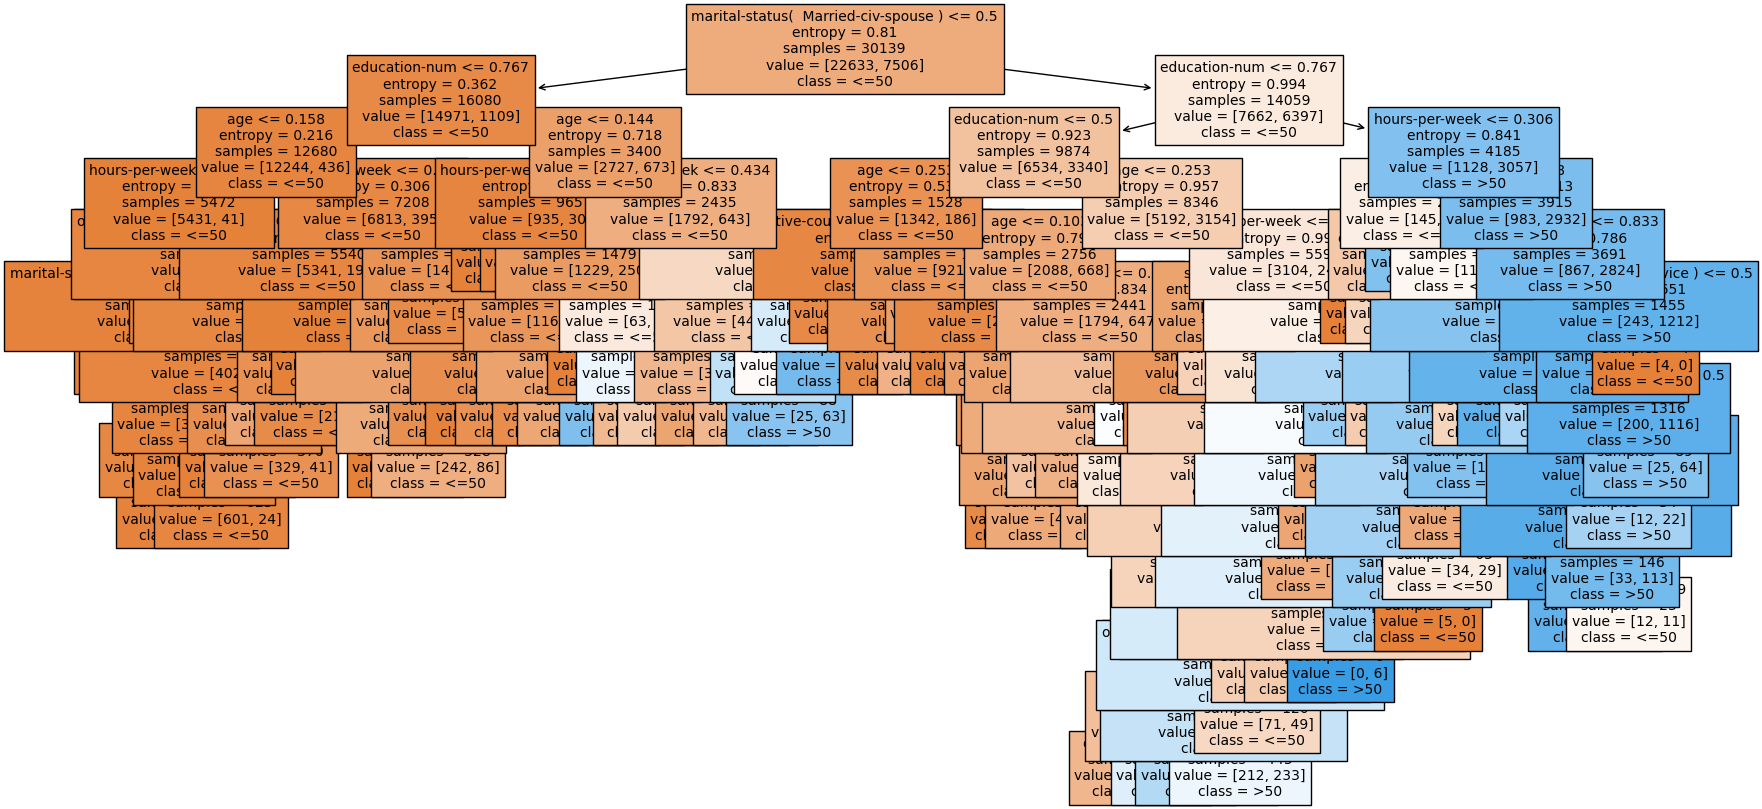

In [47]:
fig, ax = plt.subplots(figsize=(20, 10))  

plot_tree(tree_model, ax=ax, fontsize=10, \
          feature_names=dataset.columns.tolist(), class_names=['<=50','>50'], filled=True)

plt.show()

### Random Forest

In [48]:
grid_of_values ={'ccp_alpha':[1, 0, 0.1, 0.05, 0.0005, 0.00005, 0.025,0.0003, 0.00033,0.0004,0.0025]}

grid_model = GridSearchCV(estimator=DecisionTreeClassifier(), param_grid=grid_of_values, cv=5)

grid_model.fit(x_train,y_train)

best_alpha = grid_model.best_params_['ccp_alpha']

print("Best alpha value",best_alpha)



tree_model = RandomForestClassifier(n_estimators=100,criterion = 'entropy', \
                                    ccp_alpha=best_alpha , random_state=1)

tree_model.fit(x_train, y_train)

y_predicted_testing = tree_model.predict(x_val)

y_predicted_training = tree_model.predict(x_train)

cm = confusion_matrix(y_predicted_testing, y_val)

cm_train = confusion_matrix(y_predicted_training, y_train)

acc_forest_test = accuracy(cm)
acc_forest_train = accuracy(cm_train)
print("Accuracy of testing Forest Decision tree: ", acc_forest_test)
print("Accuracy of training Forest Decision tree: ", acc_forest_train)

Best alpha value 0.0003
Accuracy of testing Forest Decision tree:  0.8352042510793756
Accuracy of training Forest Decision tree:  0.8400411427054647


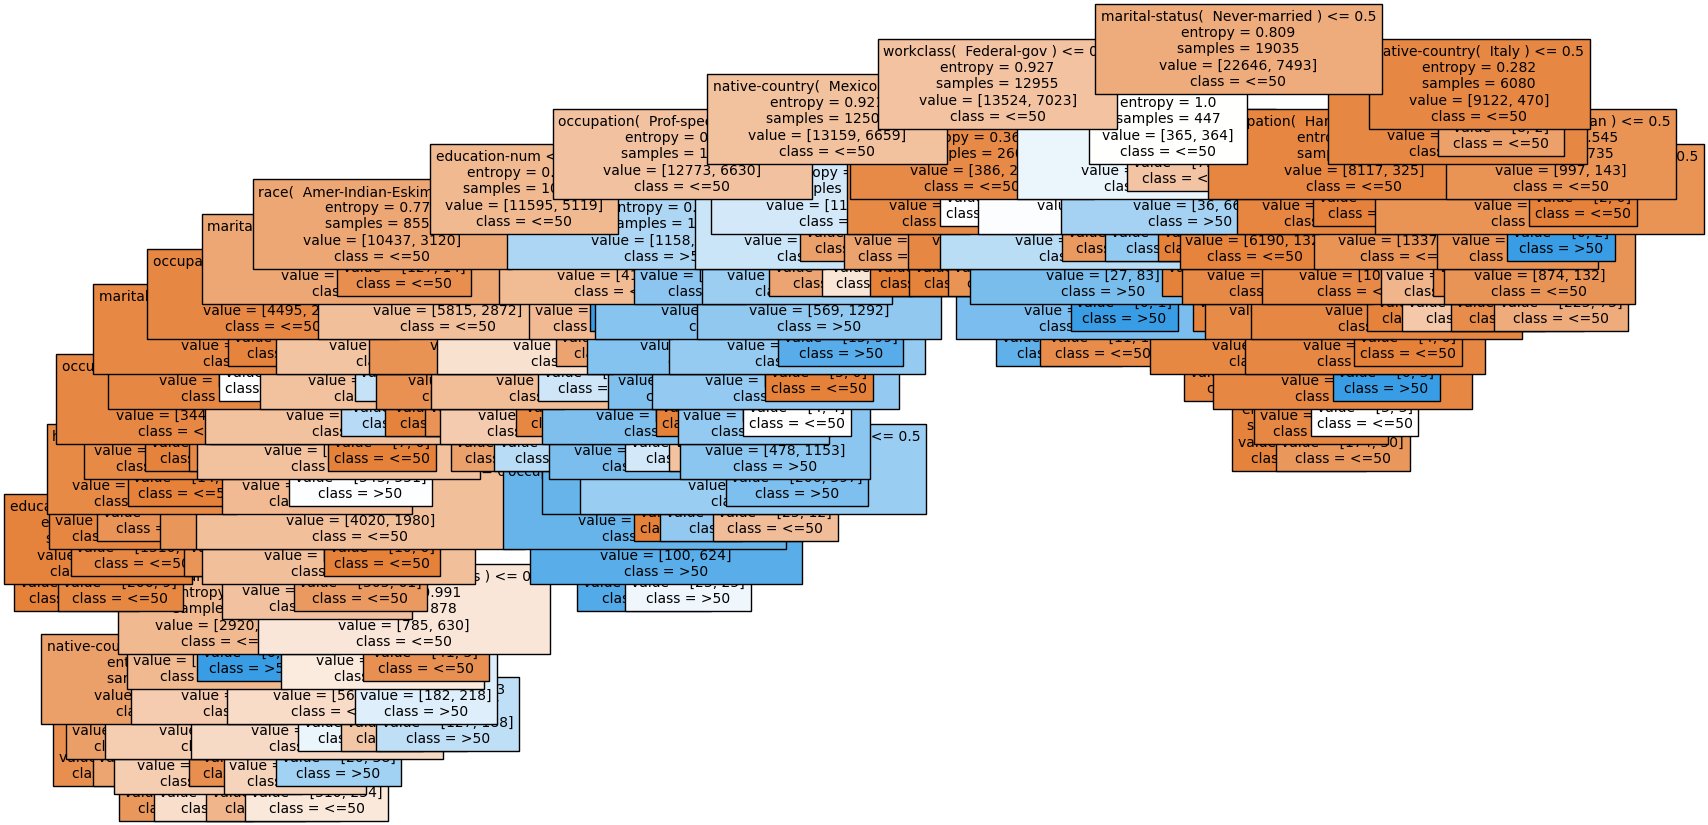

In [49]:
fig, ax = plt.subplots(figsize=(20, 10))  
plot_tree(tree_model[0], ax=ax, fontsize=10, \
          feature_names=dataset.columns.tolist(), class_names=['<=50','>50'], filled=True)
plt.show()

### Logistic Regression

In [50]:
logreg_model = LogisticRegression(max_iter=400,random_state=0)
logreg_model.fit(x_train, y_train)

y_predicted_testing = logreg_model.predict(x_val)
y_predicted_training = logreg_model.predict(x_train)

cm = confusion_matrix(y_predicted_testing, y_val)
cm_train = confusion_matrix(y_predicted_training, y_train)

acc_log_train = accuracy(cm_train)
acc_log_test = accuracy(cm)

print("Accuracy of testing Logistic function :", acc_log_test)
print("Accuracy of training Logistic function :", acc_log_train)

Accuracy of testing Logistic function : 0.8285619395549652
Accuracy of training Logistic function : 0.8303195195593749


### Unsupervised learning: clustering K-means

In [31]:
x_train = dataset.iloc[:,0:-1].values
y_train = dataset.iloc[:,-1].values


In [ ]:
kmeans_model = KMeans(n_clusters=2, init='random', n_init=10)
kmeans_model.fit(pca_coordinates)

y_labels = kmeans_model.labels_

silhouette_avg = silhouette_score(x_train, y_labels)
sample_silhouette_values = silhouette_samples(x_train, y_labels)

print(f'overall clustering silhouette {silhouette_avg}')

In [ ]:
fig, ax = plt.subplots(1,1,figsize=(15,5))
y_lower = 0 
y_upper = 0

for i,cluster in enumerate(np.unique(y_labels)):
    
    cluster_silhouette_vals = sample_silhouette_values[y_labels == cluster]
    cluster_silhouette_vals.sort()
    cluster_silhouette_mean=cluster_silhouette_vals.mean()
    
    y_upper += len(cluster_silhouette_vals)
    color = cm_matlib.nipy_spectral(float(i) / 2)
    
    ax.barh(range(y_lower,y_upper), cluster_silhouette_vals, height=1, color=color)
    ax.text(-0.03, (y_lower+y_upper)/2, str(i))
    ax.text(silhouette_avg+0.03, y_lower, cluster_silhouette_mean) 
    
    y_lower += len(cluster_silhouette_vals)

In [63]:
frame_accuracy = { "Modello": ["MLPClassifier", "Decision Tree", \
                               "Random Forest", "Logistic Regression"], \
                   "Training Score": [acc_mlp_train, acc_tree_train, acc_forest_train,\
                                      acc_log_train], \
                   "Test Score": [acc_mlp_test, acc_tree_test, acc_forest_test, \
                                  acc_log_test] } 

# Creazione del DataFrame con indice gerarchico 
df = pd.DataFrame(frame_accuracy) 

df.set_index(["Modello"], inplace=True) 

#df.columns = pd.MultiIndex.from_product([["Score"], df.columns])
 
df

,Training Score,Test Score
Modello,,
MLPClassifier,0.854839,0.828429
Decision Tree,0.838880,0.832414
Random Forest,0.840041,0.835204
Logistic Regression,0.830320,0.828562


<Axes: ylabel='Modello'>

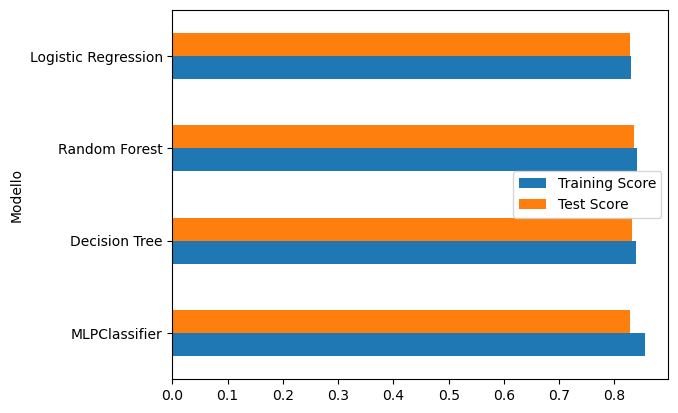

In [71]:
df.loc[:,'Training Score':'Test Score'].plot.barh()